In [32]:
from Dijkstra_module import dijkstra
import numpy as np
import matplotlib.pyplot as plt
import noise
from mapping import generar_mundo
import mapping as mp
from matplotlib.colors import ListedColormap

G = np.array([
    [0, 3, 9, 0, 0, 0, 0],
    [0, 0, 0, 7, 1, 0, 0],
    [0, 2, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 8],
    [0, 0, 4, 5, 0, 9, 0],
    [0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 0],
    ])
G =G.astype(float)
dijkstra(G,0,6)

(15.0, [6, 5, 3, 4, 1, 0])

In [1]:
# Sistema de información
# Diseño óptimo de ruta para línea de transmisión
import numpy as np
from mapping import mostrar_mapa
from mapping import generar_mundo
from mapping import crear_bosques
from mapping import crear_hidrico
from mapping import crear_microzonas
from mapping import crear_pendientes
from mapping import crear_vial
import pandas as pd

# Micro áreas
h = 1 # alto km
w = 1 # ancho km

# tamaño de la zona en áreas 
H = 100 # alto km
W = 100 # ancho km

shape = np.array((H,W))
scale = (H*w + W*h)/(2*w*h)

# Costos
"""
Se contemplan los costos en unidades $/km 
Sobre este costo operan los siguientes factores
"""
costo_bosque =      100000  # US$/km
costo_pendiente =   100000  # US$/km
costo_distancia =   100000  # US$/km
costo_vias =        100000  # US$/km
costo_hidrico =     100000  # US$/km

world = generar_mundo(H, W, scale, 6, 0.5, 2.0,2023)
zacti,cmap_acti = crear_microzonas(world, shape, 0.55)
zbosq,cmap_bosq = crear_bosques(world, zacti)
zpend,cmap_pend = crear_pendientes(world, zacti)
zhidr,cmap_hidr = crear_hidrico(world, zacti)
zvias,cmap_vias = crear_vial(world, zacti,1)


FCost_Zbosq=[1, 0.5, 0]
FCost_Zvia=[0, 0.5, 0.8, 2, 4]

rows, cols = np.where(zacti)

pos = np.where(zacti)


In [2]:
for i in range(100):
    world = generar_mundo(H, W, scale, 6, 0.5, 2.0,np.random.randint(0,2000))
    zacti,cmap_acti = crear_microzonas(world, shape, 0.55)
    zbosq,cmap_bosq = crear_bosques(world, zacti)
    zpend,cmap_pend = crear_pendientes(world, zacti)
    zhidr,cmap_hidr = crear_hidrico(world, zacti)
    zvias,cmap_vias = crear_vial(world, zacti,1)    

    dfworld=pd.DataFrame(world)
    dfzacti=pd.DataFrame(zacti)
    dfzbosq=pd.DataFrame(zbosq)
    dfzpend=pd.DataFrame(zpend)
    dfzhidr=pd.DataFrame(zhidr)
    dfzvias=pd.DataFrame(zvias) 

    writer = pd.ExcelWriter(f'mapa{i}.xlsx', engine='xlsxwriter')    

    dfzacti.to_excel(writer, sheet_name='acti',index=False, header=False)
    dfzbosq.to_excel(writer, sheet_name='bosq',index=False, header=False)
    dfzpend.to_excel(writer, sheet_name='pend',index=False, header=False)
    dfzhidr.to_excel(writer, sheet_name='hidr',index=False, header=False)
    dfzvias.to_excel(writer, sheet_name='vias',index=False, header=False)
    dfworld.to_excel(writer, sheet_name='world',index=False, header=False)  

    writer.save()

KeyboardInterrupt: 

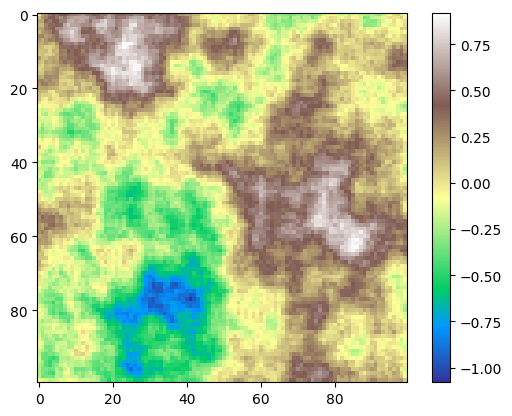

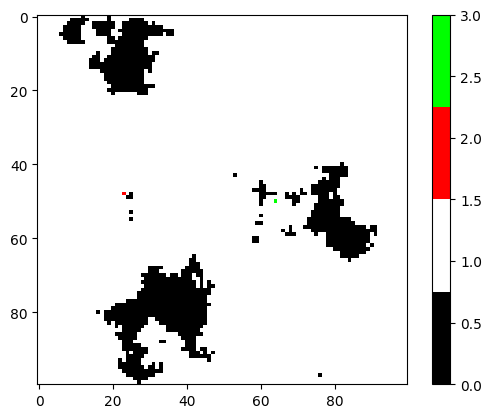

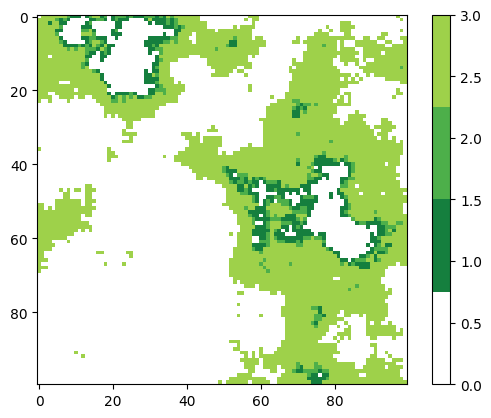

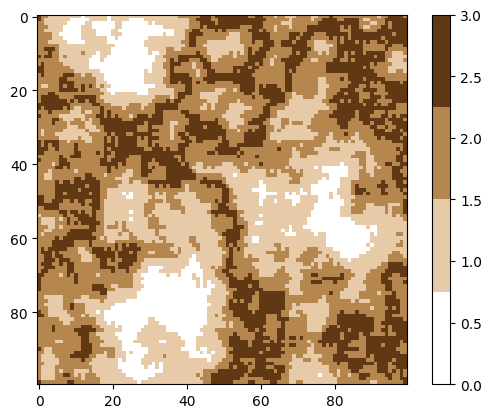

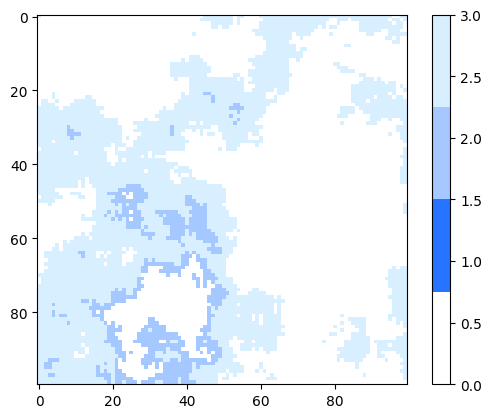

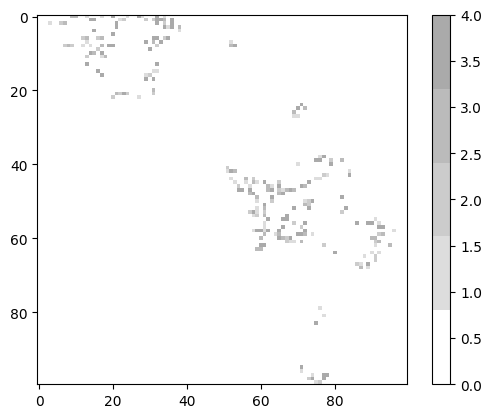

In [43]:
world = generar_mundo(100,100, 50, 6, 0.5, 3,2023)
zacti,cmap_acti = crear_microzonas(world, shape, 0.6)
zbosq,cmap_bosq = crear_bosques(world, zacti)
zpend,cmap_pend = crear_pendientes(world, zacti)
zhidr,cmap_hidr = crear_hidrico(world, zacti)
zvias,cmap_vias = crear_vial(world, zacti,1)

dfworld=pd.DataFrame(world)
dfzacti=pd.DataFrame(zacti)
dfzbosq=pd.DataFrame(zbosq)
dfzpend=pd.DataFrame(zpend)
dfzhidr=pd.DataFrame(zhidr)
dfzvias=pd.DataFrame(zvias)

writer = pd.ExcelWriter('mapaini.xlsx', engine='xlsxwriter')

dfzacti.to_excel(writer, sheet_name='acti',index=False, header=False)
dfzbosq.to_excel(writer, sheet_name='bosq',index=False, header=False)
dfzpend.to_excel(writer, sheet_name='pend',index=False, header=False)
dfzhidr.to_excel(writer, sheet_name='hidr',index=False, header=False)
dfzvias.to_excel(writer, sheet_name='vias',index=False, header=False)
dfworld.to_excel(writer, sheet_name='world',index=False, header=False)

writer.save()
mostrar_mapa(world,'terrain')
mostrar_mapa(zacti,cmap_acti)
mostrar_mapa(zbosq,cmap_bosq)
mostrar_mapa(zpend,cmap_pend)
mostrar_mapa(zhidr,cmap_hidr)
mostrar_mapa(zvias,cmap_vias)

In [142]:
import numpy as np
import pandas as pd

h = 1
w = 1
H = 100
W = 100

CostoBosque = 1000000
CostoPendiente = 100000
CostoDistancia = 100000
CostoVias = 400000

filename = '../Lineas_verdes/dijkstra V1 (2)/dijkstra V1/Mapasv1.xlsx'
ZonasActivas = 'MicroAreas Activas'
Zacti = pd.read_excel(filename, sheet_name=ZonasActivas,header=None).to_numpy()
ZonasBosque = 'Bosque'
Zbosq = pd.read_excel(filename, sheet_name=ZonasBosque,header=None).to_numpy()
ZonasPendiente = 'Pendiente'
Zpend = pd.read_excel(filename, sheet_name=ZonasPendiente,header=None).to_numpy()

ZonasVias = 'Vias'
Zvias = pd.read_excel(filename, sheet_name=ZonasVias,header=None).to_numpy()

FCost_Zbosq = [1, 0.5, 0]
FCost_Zvia = [0, 0.5, 0.8, 2, 4]
FCost_Zpend = [1, 0.3, 0.2]



/home/dancastarod/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/dancastarod/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/dancastarod/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [172]:
rows,cols = np.where(Zacti)
pos = np.ravel_multi_index((rows, cols),(100,100))
NumMicroAreas = pos.shape[0]
NumColumnas = W/w
NumFilas = H/h
MapaMicroAreaActiva = np.array([np.arange(0,NumMicroAreas),pos,rows,cols]).T

MicroAreaIni = np.argwhere(Zacti == 2)


array([[5816, 9900,   99,    0],
       [5817, 9901,   99,    1],
       [5818, 9902,   99,    2],
       [5819, 9903,   99,    3],
       [5820, 9904,   99,    4],
       [5821, 9905,   99,    5],
       [5822, 9906,   99,    6],
       [5823, 9907,   99,    7],
       [5824, 9908,   99,    8],
       [5825, 9909,   99,    9],
       [5826, 9910,   99,   10],
       [5827, 9911,   99,   11],
       [5828, 9912,   99,   12],
       [5829, 9913,   99,   13],
       [5830, 9914,   99,   14],
       [5831, 9915,   99,   15],
       [5832, 9916,   99,   16],
       [5833, 9917,   99,   17],
       [5834, 9918,   99,   18],
       [5835, 9919,   99,   19],
       [5836, 9920,   99,   20],
       [5837, 9921,   99,   21],
       [5838, 9922,   99,   22],
       [5839, 9923,   99,   23],
       [5840, 9924,   99,   24],
       [5841, 9925,   99,   25],
       [5842, 9926,   99,   26],
       [5843, 9927,   99,   27],
       [5844, 9928,   99,   28],
       [5845, 9929,   99,   29],
       [58